# Predictors of Startup Success 

### Introduction

A Startup is a new company (qualified when still at a project phase) which seeks to develop an innovation capable of disrupting sectors. While entrepreneurship refers to all new businesses, including self-employment and businesses that never intend to become registered, startups refer to new businesses that intend to grow and validate a scalable economic model.  

Startups play a major role in the economic growth of many countries. They bring new ideas, spur innovation, create new technologies and are an important source of employment. Over the past two decades, the startup sector has grown exponantially in number of new companies and in the volume of capital seeking to participate as investments.

Due to their high risks, startups face high uncertainty and a minority of them go on to be successful and influential. Their inherent risk and requirement for large amounts of capital make successful investment hard to come by. In fact, on average Venture Capital Funds (the main investors in startups) have a successful (IPO) investment rate of 1 out of 32. After adventuring myself in the field, it is clear that investors have limited tools to objectively identify the qualities of a successful startup and their potential to attain "success".  


Before we continue, it is important to define "what is a successfull startup?". Often we have in mind sotries of "IPO unicorns" like Facebook or Amazon, but in fact startup success could be generalized the realization of an "Exit". These events can be intiated by an acquisition (M&A) or an IPO (Initial Public Offering)

### Project Overview

Startup companiies are recently emerging and evolving more than ever. But still, many of them fail, in fact, 9 out of 10 startups fail. ***So, which are the most important characteristics to have as a startup to succeed?*** There are many factors that might play a role in this question: founders and team experience, fundings, location, product, market and so on. This report aims to investigate these questions using the [Startup Success Prediction](https://www.kaggle.com/datasets/manishkc06/startup-success-prediction) dataset available on Kaggle.  

### Problem Statement

The startup world requires a lot of decision making from the people involved, specially when dealing with situations of funding or acquisitions that will result in ownership changes. In these situations, the decision maker should have on hand all the information that can be provided with the amount of data available otday about companies, funding rounds and acquisitions.  

This project proposes a serie of supervised learning models that can forecast a startup success as well as a better understanding of the variables that most impact the acquisition or failure of a startup company. **Different supervised algorithms will be tested in order to compare our results and better understand the variables that most impact the outcome.**

### Performance Metrics

To evaluate the validity of each model, we will use the True Positive Rate, False Positive Rate and the Area under the ROC Curve (AUC_ROC). True Positive rate and False Positive rates are derived from the confusion matrix of our classifiers. Since we expect the dataset to be imbalanced such metric will be much more useful than accuracy. We expect the number of companies that are acquired will be much smaller than those in operation or closed. If we were to use accuracy, our models would probably have a high score even though their will be performing poorly for retrieving the few companies that are more likely to be acquired.  

The ROC curve combines TPR(y-axis) and FPR (x-axis). In addition, generally, the AUC is a good metric for binary classification problems.

# 1. Dataset Preparation

### Overview  
In this phase, we will import the startup dataset from the [Kaggle Dataset](https://www.kaggle.com/datasets/manishkc06/startup-success-prediction?resource=download). In addition,we will explore and prepare the dataset for further feature analysis.  

During the exploratory phase of this notebook, we will use graphics to explore and get a deeper understanding of the features at hand. Our investigation will focus on feature correlation, distribution, and null values.  

Once our exploration completed, we will seek to implement strategies to address our observations. Such strategies could be feature engineering, data imputation, label encoding and others.

## 1.1 Load available data from the CSV file

In [1]:
#All imports for this notebook are here

# core libraries & visualizations.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py

# models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
#import xgboost as xgb

#Other
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold, learning_curve
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, plot_confusion_matrix, precision_score
from sklearn.metrics import f1_score, recall_score, precision_recall_curve, roc_curve
from sklearn.metrics import accuracy_score, roc_auc_score, ConfusionMatrixDisplay

import time
from datetime import datetime
from dateutil import relativedelta

from sklearn import set_config
set_config(display="diagram")

import warnings
warnings.filterwarnings("ignore")



%matplotlib inline

In [2]:
#Start by importing our csv file into a dataframe
df = pd.read_csv('data/startup data.csv')

In [3]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


## 1.2 Dataset Description - Basic EDA

The dataset extracted from Kaggle did not have a description of the features. For this reason, it may be necessary to drop features with limited interpretability or understanding of its impact. For now, we will keep all features and try to better understand the meaning of each feature through EDA. At the end of this section, we will create our own description of the features on hand with the best of our knowledge.

In [4]:
# We will start by getting a rudimentary understanding of the dataset and features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [5]:
# Let's create a list of categorical feature
list_categories = df.select_dtypes("object").columns.tolist()
list_categories

['state_code',
 'zip_code',
 'id',
 'city',
 'Unnamed: 6',
 'name',
 'founded_at',
 'closed_at',
 'first_funding_at',
 'last_funding_at',
 'state_code.1',
 'category_code',
 'object_id',
 'status']

In [6]:
#Let's explore the numerical features with the describe function
df.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,...,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,...,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [7]:
# Explore the columns with missing data
print(df.isnull().sum())

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

### Summary of the EDA and Basic Description of the columns

The dataframe contains 923 observations and 49 features/column. Our last column "Status" is the target column which has no null values. Currently, the target feature contains "closed" as a failure or "0" and "acquired" as a success or "1". Later, if necessary, we will consider label encode the column to obtain a binary value.  

There are 14 categorical features and 35 numerical features. Of all the features, only 5 have missing values. The feature with the largest number of missing value is "closed_at" with over half of the data missing with 588. Next, the column "unnamed_6" is missing 493 datapoints. "age_first_milestone_year" & "age_last_milestone_year" are both missing around 10% of the data with 152. Finally, the state_code.1 column is missing 1 entry.  

The following column list is hard to understand the real world meaning of the underlying data:
- "Unnamed: 0", "Unnamed: 6", "avg_participants", "is_top500"  

In addition, the following features seem to be related:
- "state_code", "latitude", "longitude", "zip_code", "city", "state_code.1", "is_CA", "is_NY", "is_MA", "is_TX", "is_otherstate"
- "category_code", "is_software", "is_web", "is_mobile", "is_enterprise", "is_advertising", "is_gamesvideo", "is_ecommerce", "is_biotech", "is_consulting", "is_othercategory"
- "has_VC", "has_angel", "has_roundA", "has_roundB", "has_roundC", "has_roundD"  

The dataset seems to have a lot of datapoints with little interpretability. As we proceed with our analysis, it will be important to consider the business application of the features included in the model.

## 1.3 Visual EDA

Now, we will use boxplots, bar charts and correlations matrices to understand the relationship across features and get a better understanding of how we should proceed with each feature.

### 1.3.1 Numerical Features

['Unnamed: 0', 'latitude', 'longitude', 'labels', 'age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year', 'relationships', 'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants', 'is_top500']


Text(0.5, 1.1, 'Box plot of numerical variables')

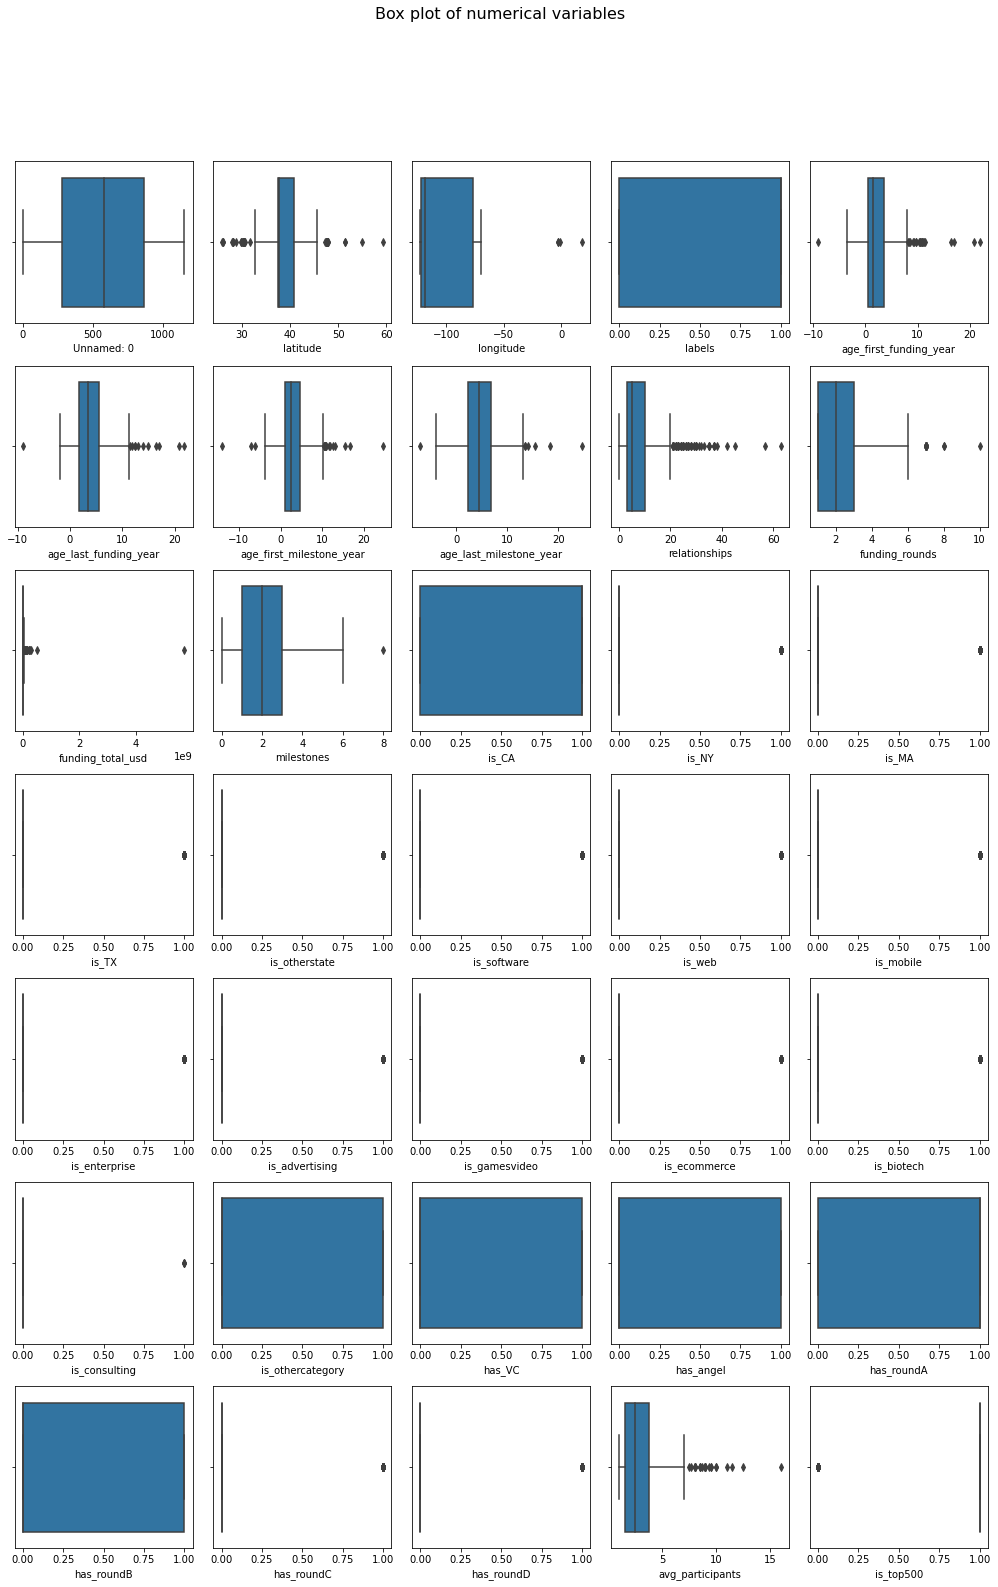

In [8]:
#Box plot of Numerical features to examine the distribution of the features

num_column_lst = []
for icol in df.columns:
    if df[icol].dtypes in ['float64', 'int64']:
        num_column_lst.append(icol)
print(num_column_lst)

fig, axs = plt.subplots(nrows = 7, ncols=5, figsize = (14,20))
for name,ax in zip(num_column_lst,axs.flatten()):
    sns.boxplot(data=df,x=name,ax=ax)
  # plt.show()
fig.tight_layout()
fig.suptitle('Box plot of numerical variables',y=1.1,fontsize=16)

Text(0.5, 1.05, 'Distribution Plot of Numerical Features')

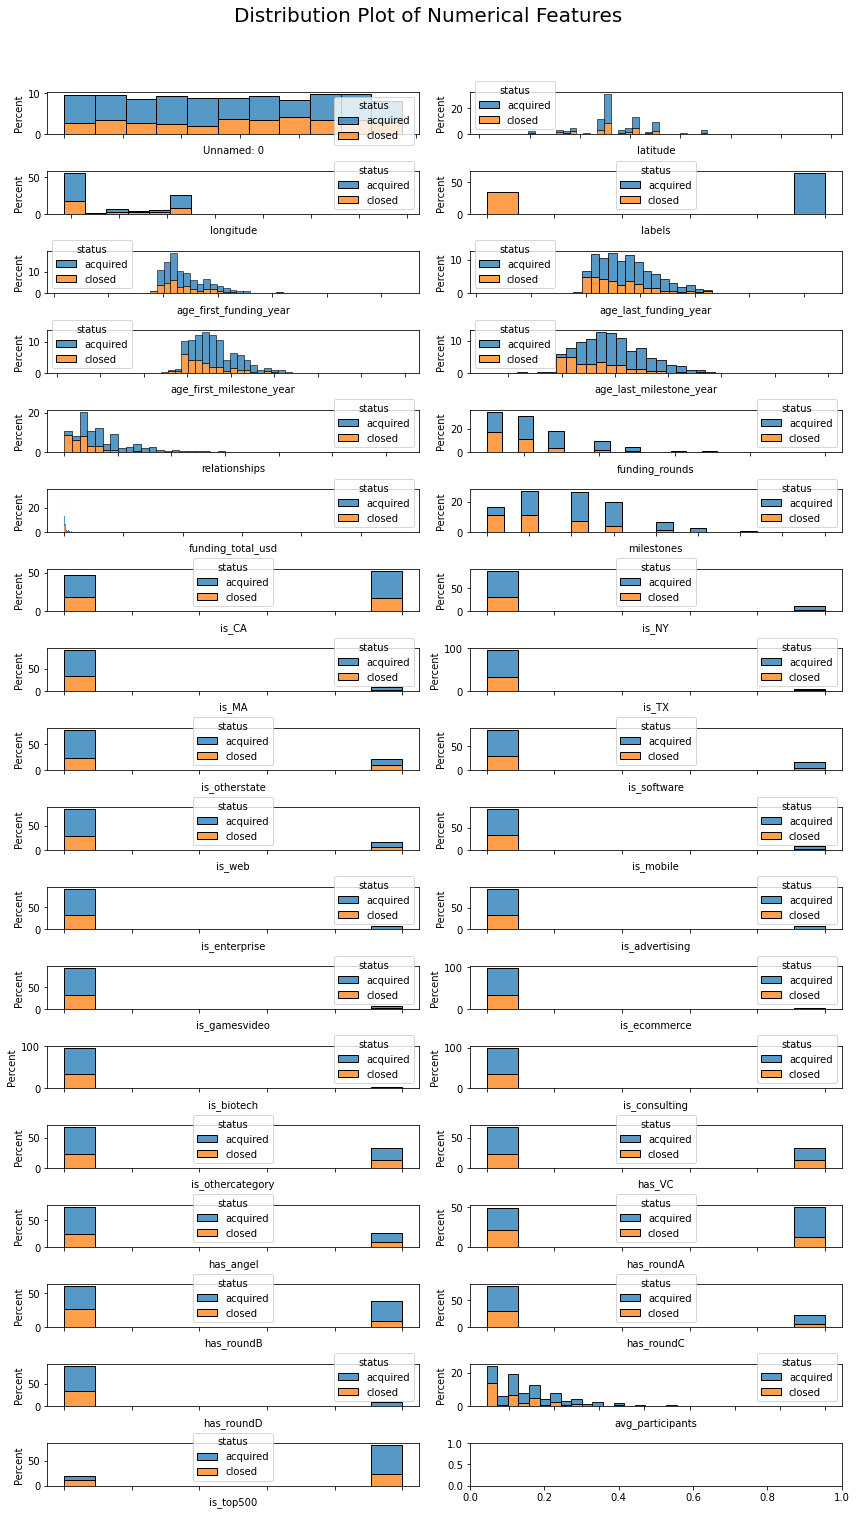

In [9]:
# Distribution Plot of the Numerical features 
fig, axs = plt.subplots(nrows = 18, ncols=2, figsize = (12,20))
for name,ax in zip(num_column_lst,axs.flatten()):
    sns.histplot(data=df,x=name,ax=ax,hue='status',multiple='stack',stat='percent')
    ax.set_xticklabels(ax.get_xticklabels(minor=True,which='minor'),rotation=0,fontsize=50)

fig.tight_layout()
fig.suptitle('Distribution Plot of Numerical Features',y=1.05,fontsize=20)

Text(0.5, 1.0, 'Correlation Matrix of the numerical features')

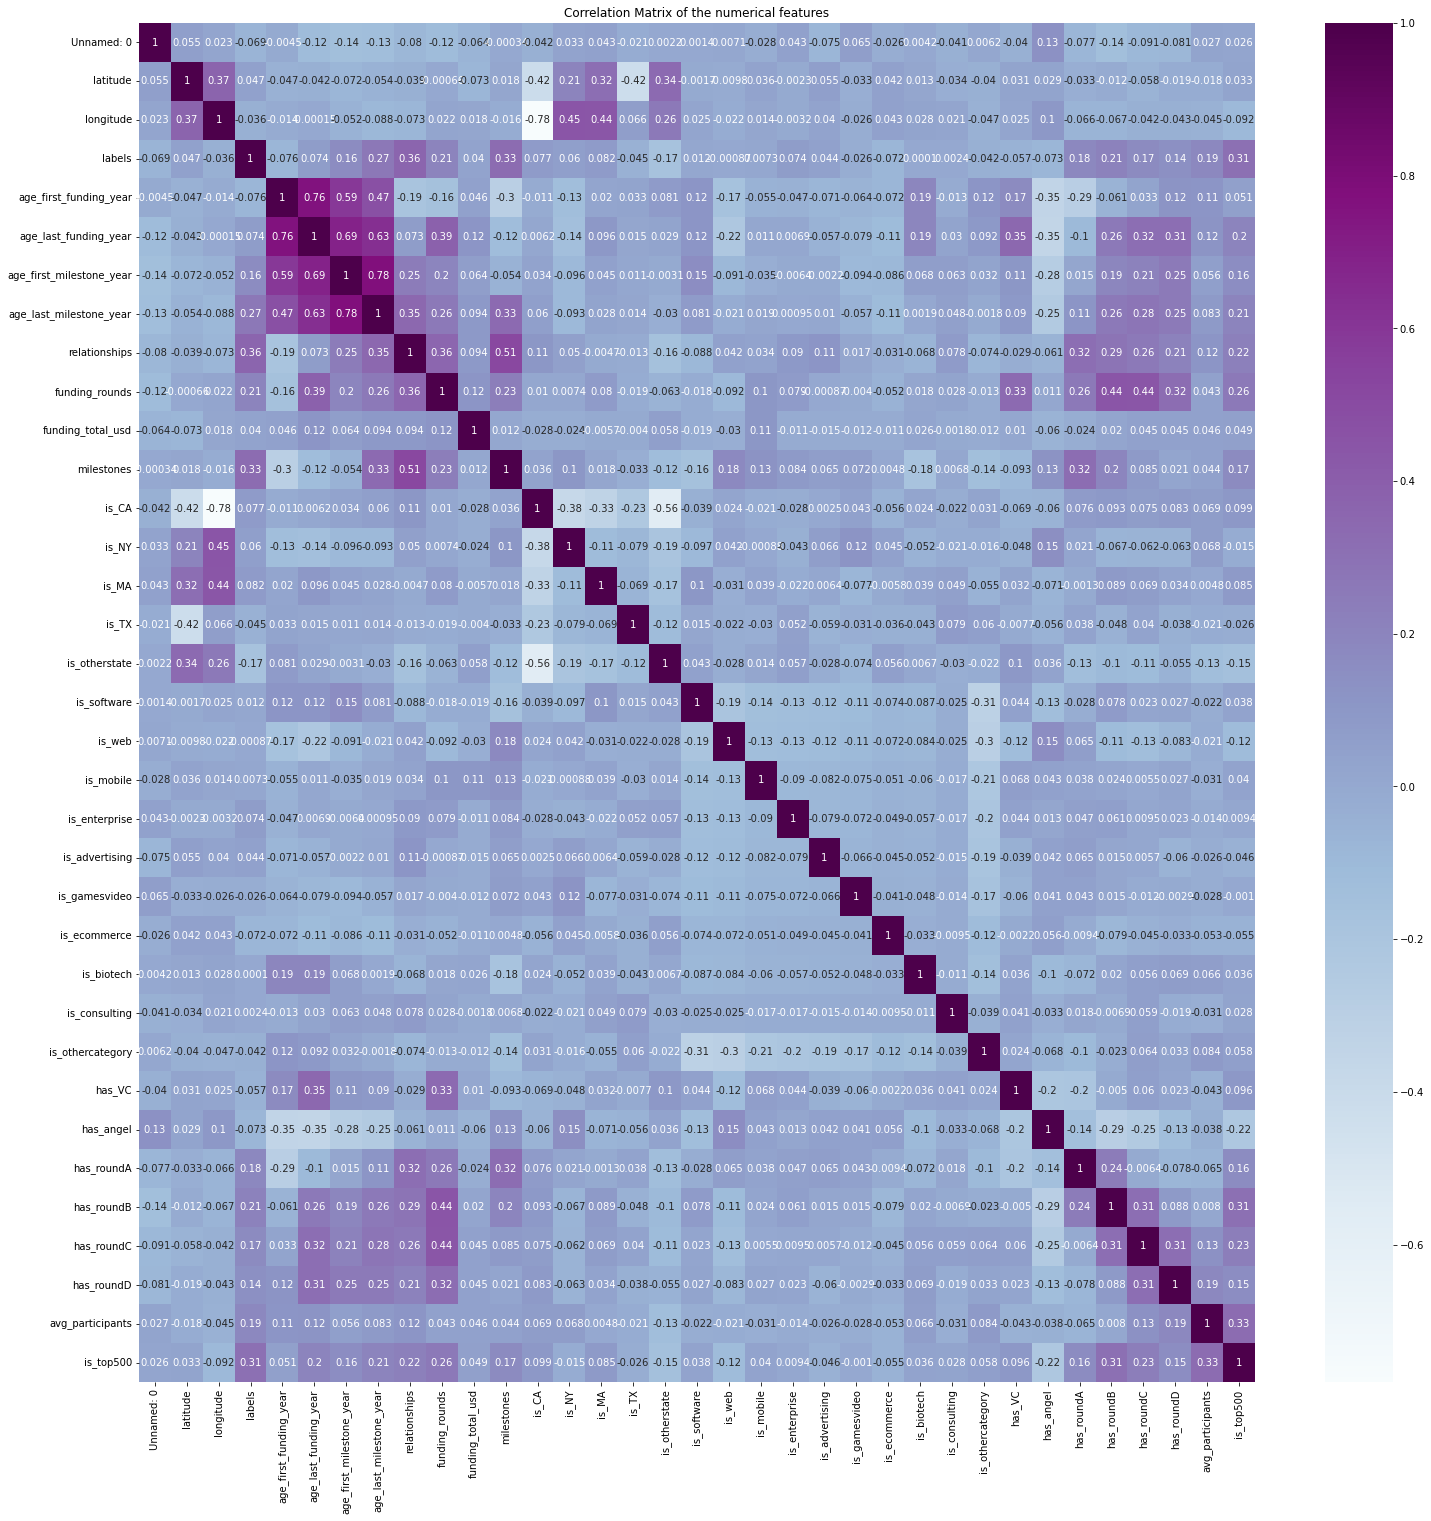

In [10]:
plt.figure(figsize=(25, 25))
sns.heatmap(df.corr(), annot=True, cmap='BuPu')
plt.title('Correlation Matrix of the numerical features')

### 1.3.1 Visual EDA Summary - Numerical Features
##### Box Plot & Distribution Plots Review
As we reviewed the box plots, we were able to observe that the following columns were binary:
- 'labels', 'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD', 'is_top500'

It is worth noting that the following columns seem to be One Hot Encoded. I attached each group of features to my interpretation of its overarching feature:
- Headquartered in (state): 'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate'
- Targeted Market: 'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory'
- Funding Stage: 'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD'

Hence, there are 21 features that are really a One Hot Encoding of 3 overarching features. Interestingly, it could be debated if One Hot Encoding the Funding Stage is appropriate. In practice, although not absolute, it is much more common for companies to have an order in the funding hence an ordinal encoding technique may be more appropriate. 

An interesting observation regarding the features 'age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year' and 'age_last_milestone_year' is the presence of a negative age number. Although surprising, I do not believe corrections are required. Startups are often spurred from ideas more than corporation, hence it is possible to accomplish milestones (white paper published or pre-seed funding for research) years before the company is created in a formal manner.

Furthermore, there is an outlier in the feature 'funding_total_usd'. The feature seem to span from a few hundred thousand to hundreds of millions. Datapoints in the billion are either a data entry mistake or could skew the dataset drastically. Hence, we will investigate further in a later step.

As we observe the distribution plots, it is interesting to note the clear change in proportion of acquired vs closed companies as the distribution change in the following features:
- 'age_of_first_milestone', 'age_of_last_milestone', 'relationships', 'funding_rounds', 'milestones', 'is_CA'

Moreover, the feature label seems to be a label encoder of our output feature. Interestingly, we see a lot more acquired companies than closed companies. Either way,It is clear that were are dealing with an imbalanced dataset.


#### Correlation Matrix

It is interesting to note that the features are not correlated in general. The feature 'age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year' are 'age_last_milestone_year' are highly correlated and we will consider at the next step what to do with them.

### 1.3.2 Categorical Features

['state_code', 'zip_code', 'id', 'city', 'Unnamed: 6', 'name', 'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at', 'state_code.1', 'category_code', 'object_id', 'status']


Text(0.5, 1.05, 'Distribution of Categorical variables')

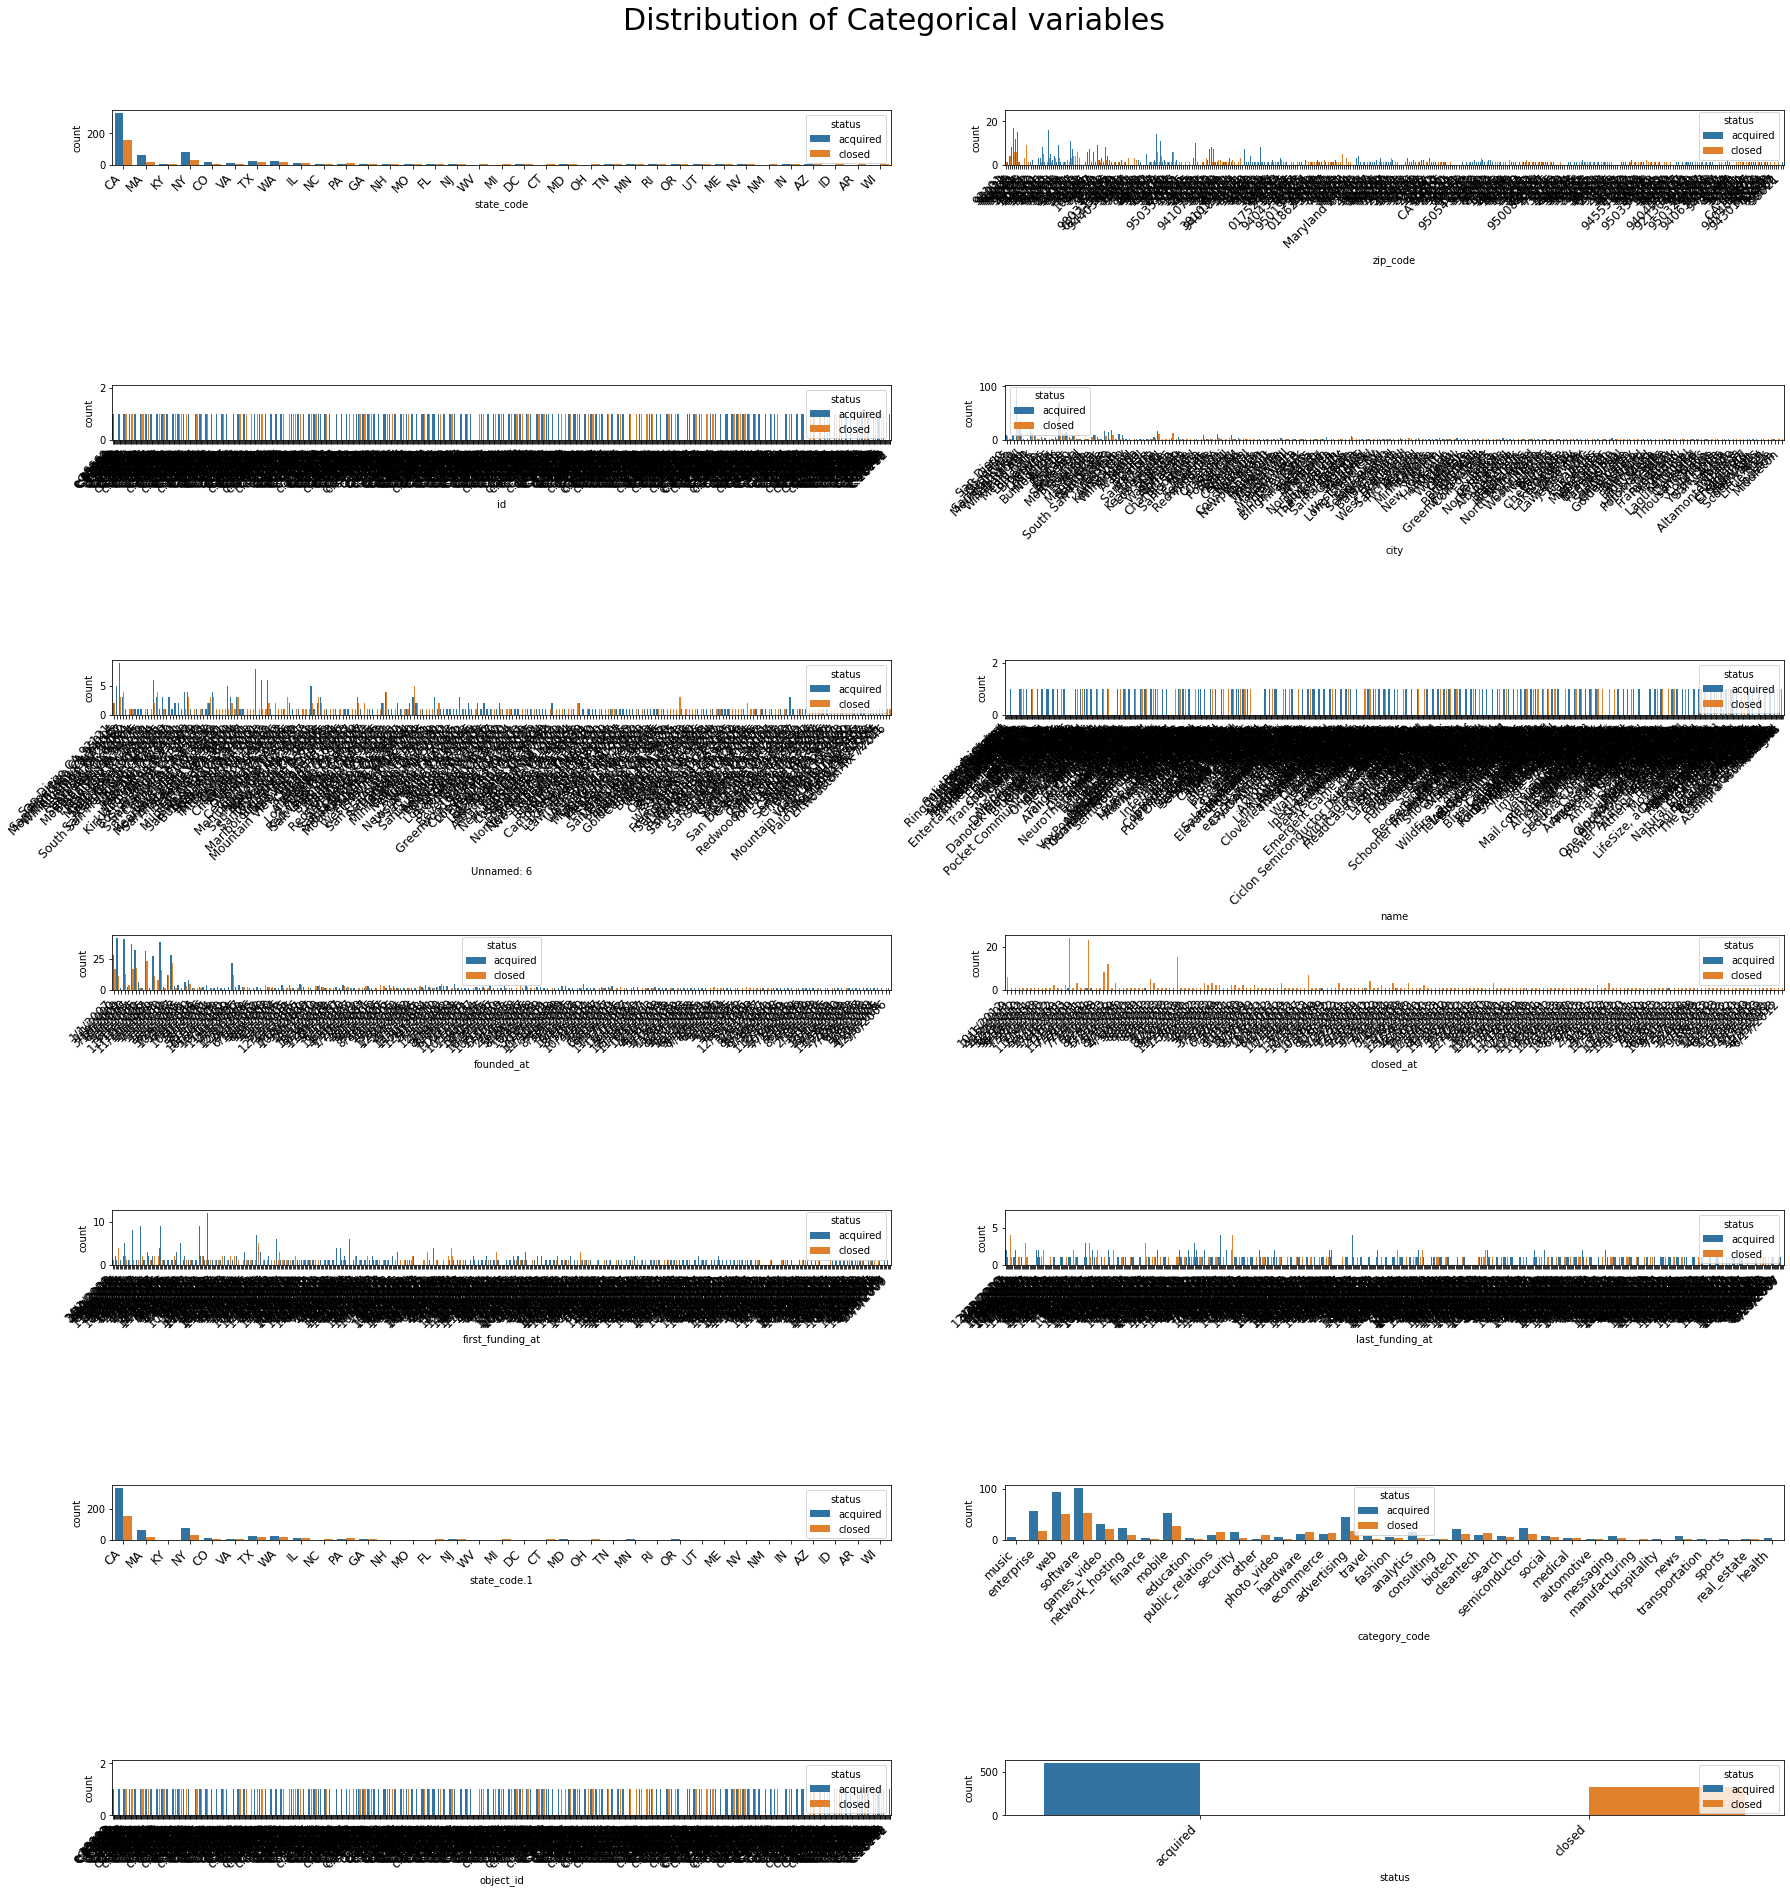

In [11]:
#Bar Chart of Categorical features to examine the distribution of the features
cat_column_lst = []
for icol in df.columns:
    if df[icol].dtypes in ['object']:
        cat_column_lst.append(icol)
print(cat_column_lst)

fig, axs = plt.subplots(nrows = 7, ncols=2, figsize = (25,25))
for name,ax in zip(cat_column_lst,axs.flatten()):
    sns.countplot(data=df,x=name,ax=ax,hue='status')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=12)

fig.tight_layout()
fig.suptitle('Distribution of Categorical variables',y=1.05,fontsize=30)

In [12]:
#Count number of unique values on categorical features
count = df[cat_column_lst].nunique()
count

state_code           35
zip_code            382
id                  922
city                221
Unnamed: 6          252
name                922
founded_at          217
closed_at           202
first_funding_at    585
last_funding_at     680
state_code.1         35
category_code        35
object_id           922
status                2
dtype: int64

In [13]:
# Create a new category column since most features are have a large number unique values
new_cat_column_lst = ['state_code', 'state_code.1', 'category_code', 'status']

Text(0.5, 1.05, 'Distribution of Categorical variables')

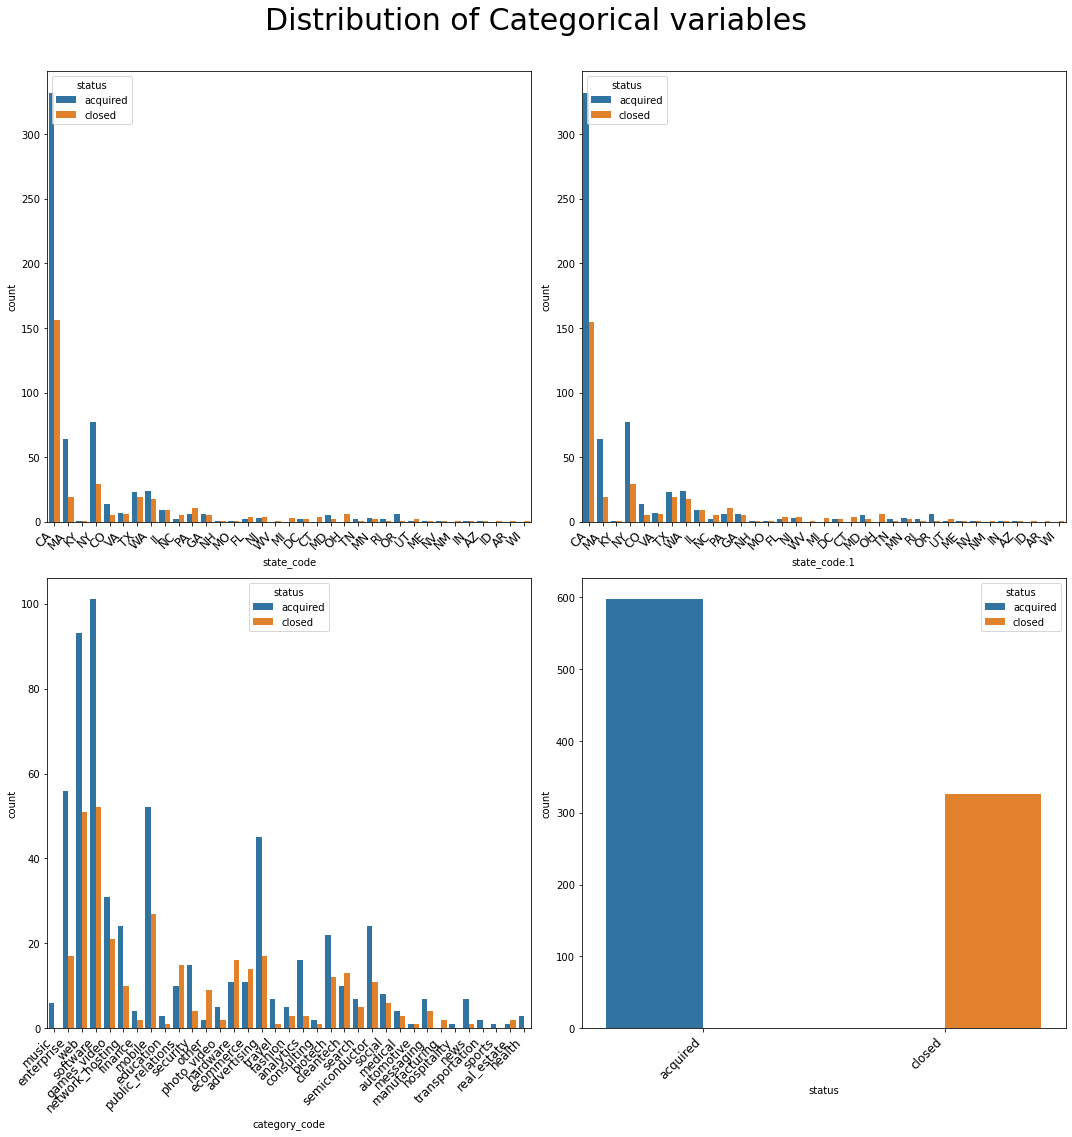

In [14]:
fig, axs = plt.subplots(nrows = 2, ncols=2, figsize = (15,15))
for name,ax in zip(new_cat_column_lst,axs.flatten()):
    sns.countplot(data=df,x=name,ax=ax,hue='status')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=12)

fig.tight_layout()
fig.suptitle('Distribution of Categorical variables',y=1.05,fontsize=30)

### 1.3.2 Summary of the Visual EDA - Categorical Features

After our first run to observe the categorical features. We realize that many features have a large number of unique features. Hence, we will not be able to explore the distribution of these features through bar graphs. The list of these features are:
- 'zip_code', 'id', 'city', 'Unnamed: 6', 'name', 'object_id'
- 'first_funding_at', 'last_funding_at', 'founded_at', 'closed_at' are dates

As we can see State Code and State Code.1 show that the sample has been overwhelmingly sampled in CA, NY and MA. This may not represent an accurate representation of the reality as Texas is an important startup hub and is currently under represented in this sample. Simlarly, digital companies (web, software, games_video) are a large proportion of the dataset.

Additionally, it is interesting to note that the dataset contains double the number of acquired startup vs closed startup. This is contrary to the reality of the business environment. As previously mentioned, the startup success rate is of less than 10%. Although, the presence of a lot of 'acquired' companies gives a greater chance to understand their characteristics.

# 1.4 Feature Description

Now that we have conducted preliminary data analysis, we should create a feature description with our knowledge of the dataset before entering the feature engineering and dataset cleaning. This will give us the business understanding for the next steps.

#### Feature Description According to my Analysis of the Dataset:
- 'Unnamed: 0': No interpretability 
- 'state_code': Each company's location (state level)
- 'latitude': Coordinate for location 
- 'longitude': Coordinate for location 
- 'zip_code': Company scpecific location. (considered an alternative to ID)  
- 'id': Company assigned id number
- 'city': Each company's location (city level)
- 'Unnamed: 6': Each Company's full address with postal code
- 'name': Each company's name (equivalent to an ID)
- 'labels': Is a integer version of the target variable status
- 'founded_at': Each company's founding date
- 'closed_at': This contains the closing date of the company's who's status is 'closed'
- 'first_funding_at': the date of the first funding round
- 'last_funding_at': the date of the last funding round
- 'age_first_funding_year': The age of the company when they achieved their first round of funding
- 'age_last_funding_year': The age of the company when they achieved their last round of funding 
- 'age_first_milestone_year': The age of the company when they achieved their first milestone (note milestones are not defined)
- 'age_last_milestone_year': The age of the company when they achieved their last milestone (note milestones are not defined)
- 'relationships': number of relationships (relationships are not defined between investor relationship or client relationship)
- 'funding_rounds': number of funding rounds
- 'funding_total_usd': total funding received in USD
- 'milestones': milestones achieved
- 'state_code.1': Each company's location (state level)
- Headquartered in (state): 'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate' = one hot encoding
- 'category_code': category of operation / industry
- Targeted Market/Industry: 'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory' = one hot encoding
- 'object_id': company ID
- Funding Stage/Round: 'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD' = one hot encoding
- 'avg_participants': average participants at the beginning of the company (unclear if it is number of founders/original employees or number of employess after first funding.
- 'is_top500': No interpretability
- 'status': Acquired or Closed

# 1.5 Feature Engineering & Cleaning the Dataset

To begin with, we will group the feature as we understand them (using section 1.4):  

**ID Features:**
- 'latitude', 'longitude', 'zip_code', 'id', 'Unnamed: 6', 'name', 'object_id'  

*Since we already have an index which acts as a company ID, we will drop the ID features underlined here.*

**Location Features:**
- 'state_code', 'city', 'state_code.1', Headquartered in (state)  

*Due to the duplication of many feature and the the location feature is One hot encoded from the 'Headquartered in'. We will drop 'state_code', 'city', 'state_code.1' to remove duplication of features. Instead, we will keep the One Hot Encoding with 5 features/categories.*

**Age, Date Features:**
- 'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at', 'age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year'  

*Age from a company's inception can be better interpreted. We will drop 'founded_at', 'first_funding_at', 'last_funding_at' which are specific dates of a funding round. Furthermore, my interpretation of 'closed_at' is the closing date of the company which is after of the event/status is observed. Hence, for predictive purposes and due to the huge amount of null values, it will be dropped.*

**Funding:**
- 'age_first_funding_year', 'age_last_funding_year', 'funding_rounds', 'funding_total_usd', Funding Stage/Round  

*We will keep all of the above.*

**Industry:**
- 'category_code', Targeted Market/Industry  

*We will drop category_code as it is a duplicate of the information in targeted market/Industry (the one hot encoder summarizing the information into 10 categories.*

**No Interpretability**
- 'Unnamed: 0', 'is_top500'  

*These features do not seem to be related to other information provided in the dataset hence they will remain in the prediction feature list to see their impact on the model, but we will note the limited interpretability if found to be significant in the predictive model.*

**Output Feature:**
- 'labels', 'status'  

*We will drop 'status' as it is not currently label encoded and we will continue with labels as the 'y'*


In [15]:
# Apply the feature drop mentioned above
df_clean = df.drop(['latitude', 'longitude', 'zip_code', 'id', 'Unnamed: 6', 'name', 'object_id',
                             'state_code', 'city', 'state_code.1', 'founded_at', 'first_funding_at', 
                             'last_funding_at', 'closed_at', 'category_code', 'status'], axis = 1)

We are left with 36 features in the new dataframe instead of 49 in the original.  

**Now we will eliminate the missing values and apply the other required corrections to the new dataset.**  

### 1.5.1 Replacing NAN Values in Numerical Features

We will replace the numerical feature with NaN. As we know refer to the step 1.2, the only remaining features with NaN are 'age_first_milestone_year' & 'age_last_milestone_year'.

In [16]:
df_clean[df_clean.isna().any(axis=1)].head()

,Unnamed: 0,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
12,531,0,4.9041,4.9041,NaN,NaN,0,1,350000,0,...,0,0,1,0,0,0,0,0,1.0,0
15,898,0,6.6082,6.6082,NaN,NaN,0,1,200000,0,...,0,1,1,0,0,0,0,0,1.0,0
24,803,0,0.2521,0.3370,NaN,NaN,5,2,455000,0,...,0,1,0,1,1,0,0,0,4.5,1
32,485,0,-0.1671,2.0192,NaN,NaN,9,2,5000000,0,...,0,0,0,0,1,1,0,0,2.5,1
34,605,0,0.0822,0.0822,NaN,NaN,2,1,25000,0,...,0,1,0,1,0,0,0,0,1.0,0


**As we can see the 'age_first_milestone_year' & 'age_last_milestone_year' corresponds to rows with '0' milestones accomplished. We understand that the 3 columns are dependent of each other. Referring to the correlation matrix in step 1.3.1, we know that 'age_first_milestone_year' & 'age_last_milestone_year' are correlated (0.78). To address these issues, we will transform 'age_first_milestone_year' & 'age_last_milestone_year' to yield the time_to_accomplish_milestones hence the NaN will be replaced by 0 and the previously correlated features will be integrated into one feature. Furthermore, applying this feature as a success predictor makes sense, since the longer it takes to achieve the milestones the less likely you should be to succeed.**

In [17]:
#Replace the NaN with 0
df_clean['age_first_milestone_year'] = df_clean['age_first_milestone_year'].fillna(0)
df_clean['age_last_milestone_year'] = df_clean['age_last_milestone_year'].fillna(0)

In [18]:
#Feature engineer the 'age_first_milestone_year' & 'age_last_milestone_year' into 'time_to_accomplish_milestones'
df_clean['time_to_accomplish_milestones'] = df_clean['age_last_milestone_year'] - df_clean['age_first_milestone_year']

In [19]:
#Now drop the two columns 'age_first_milestone_year' & 'age_last_milestone_year' 
df_feat_eng1 = df_clean.drop(['age_first_milestone_year', 'age_last_milestone_year'], axis = 1)
df_feat_eng1.head()

,Unnamed: 0,labels,age_first_funding_year,age_last_funding_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,time_to_accomplish_milestones
0,1005,1,2.2493,3.0027,3,3,375000,3,1,0,...,1,0,1,0,0,0,0,1.0000,0,2.0356
1,204,1,5.1260,9.9973,9,4,40100000,1,1,0,...,0,1,0,0,1,1,1,4.7500,1,0.0000
2,1001,1,1.0329,1.0329,5,1,2600000,2,1,0,...,0,0,0,1,0,0,0,4.0000,1,0.7480
3,738,1,3.1315,5.3151,5,3,40000000,1,1,0,...,0,0,0,0,1,1,1,3.3333,1,0.0000
4,1002,0,0.0000,1.6685,2,2,1300000,1,1,0,...,0,1,1,0,0,0,0,1.0000,1,0.0000


In [20]:
corr_matrix = df_feat_eng1.corr()
print(corr_matrix["time_to_accomplish_milestones"].sort_values(ascending=False))

time_to_accomplish_milestones    1.000000
milestones                       0.637713
relationships                    0.247335
labels                           0.245475
has_roundA                       0.183103
has_roundB                       0.142388
funding_rounds                   0.140946
is_web                           0.123645
is_top500                        0.116136
has_roundC                       0.107872
is_mobile                        0.094988
is_gamesvideo                    0.056937
funding_total_usd                0.054274
is_CA                            0.050351
has_angel                        0.047872
avg_participants                 0.047083
is_enterprise                    0.037083
has_roundD                       0.031114
is_advertising                   0.021278
is_NY                            0.010258
is_MA                           -0.001313
is_TX                           -0.008605
Unnamed: 0                      -0.019556
is_consulting                   -0

We can see that the correlation between 'time_to_accomplish_milestones' and 'milestones' is fairly high. This would makes sense because a company with many milestones would be expected to have longer times before achieving all milestones.  

Interestingly, we could create another variable to eliminate such correlation by creating an 'avg_time_per_milestones'. This would be obtained by dividing the number of 'milestones' by the 'time_to_accomplish_milestones', but I would like to keep 'milestones' as a seperate feature for now.

### 1.5.2 Feature Engineering 'age_first_funding_year' & 'age_last_funding_year'

As we saw in the correlation matrix 'age_first_funding_year' & 'age_last_funding_year' have a correlation of 0.76. These features are but a snapshot in time and do not carry any meaning for the time between both. Furthermore, considering we have the number of fundings rounds and amount of funding, I would expect that the 'time_to_full_funding' would be a better predictor of success. For instance, good startups should be able to raise capital more quickly. Also, good companies should become profitable quickly and may require no further funding rounds.

In [21]:
#Feature engineer the 'age_last_funding_year' & 'age_first_funding_year' into 'time_to_full_funding'
df_feat_eng1['time_to_full_funding'] = df_feat_eng1['age_last_funding_year'] - df_feat_eng1['age_first_funding_year']

In [22]:
#Now drop the two columns 'age_first_funding_year' & 'age_last_funding_year' 
df_feat_eng2 = df_feat_eng1.drop(['age_first_funding_year', 'age_last_funding_year'], axis = 1)
df_feat_eng2.head()

,Unnamed: 0,labels,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,time_to_accomplish_milestones,time_to_full_funding
0,1005,1,3,3,375000,3,1,0,0,0,...,0,1,0,0,0,0,1.0000,0,2.0356,0.7534
1,204,1,9,4,40100000,1,1,0,0,0,...,1,0,0,1,1,1,4.7500,1,0.0000,4.8713
2,1001,1,5,1,2600000,2,1,0,0,0,...,0,0,1,0,0,0,4.0000,1,0.7480,0.0000
3,738,1,5,3,40000000,1,1,0,0,0,...,0,0,0,1,1,1,3.3333,1,0.0000,2.1836
4,1002,0,2,2,1300000,1,1,0,0,0,...,1,1,0,0,0,0,1.0000,1,0.0000,1.6685


In [23]:
corr_matrix = df_feat_eng2.corr()
print(corr_matrix["time_to_full_funding"].sort_values(ascending=False))

time_to_full_funding             1.000000
funding_rounds                   0.793134
has_roundB                       0.475302
has_roundC                       0.443267
relationships                    0.355481
has_roundD                       0.321391
has_VC                           0.320036
is_top500                        0.241988
has_roundA                       0.227045
labels                           0.211053
milestones                       0.195224
time_to_accomplish_milestones    0.153269
is_MA                            0.121338
funding_total_usd                0.118263
is_mobile                        0.087540
is_enterprise                    0.071906
is_consulting                    0.061866
is_biotech                       0.043712
avg_participants                 0.040088
is_software                      0.027395
is_CA                            0.023487
is_advertising                   0.005370
is_othercategory                -0.009050
is_TX                           -0

We can see that the correlation between 'time_to_full_funding' and 'funding_rounds' is fairly high. This would makes sense because a company with many funding rounds would be expected to have longer times to achieve full funding.

Interestingly, we could create another variable to eliminate such correlation by creating an 'avg_time_per_funding'. This would be obtained by dividing the number of 'funding_rounds' by the 'time_to_full_funding', but I would like to keep 'funding_rounds' as a seperate feature for now.

### 1.5.3 Outlier Correction 

We will now investigate the distribution of outliers in the feature 'funding_total_usd'

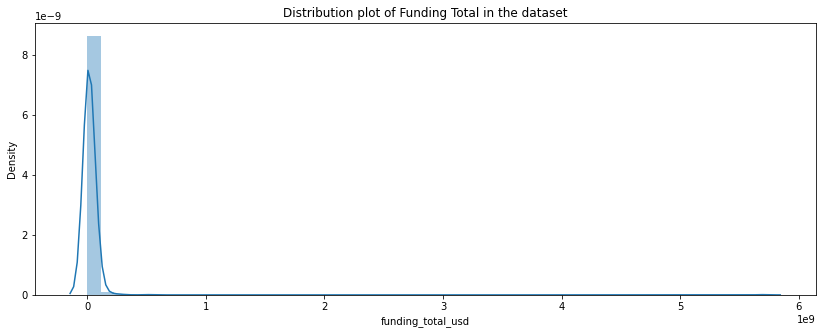

In [24]:
#Distribution plot of the funding_total_usd feature 
plt.figure(figsize=(14,5))
sns.distplot(df_feat_eng2['funding_total_usd']).set(title = 'Distribution plot of Funding Total in the dataset')
plt.show()

#### First iteration of outliers correction


In [25]:
# Maximum, Minimum, Std dev and Mean value of funding_total_usd in the dataframe
print('Max:', df_feat_eng2['funding_total_usd'].max())
print('Min:', df_feat_eng2['funding_total_usd'].min())
print('Mean:', df_feat_eng2['funding_total_usd'].mean())
print('Std. Dev.:', df_feat_eng2['funding_total_usd'].std())
      

Max: 5700000000
Min: 11000
Mean: 25419749.09209101
Std. Dev.: 189634364.4887944


In [26]:
#Upper and lower bounds for outliers
print("Highest allowed",df_feat_eng2['funding_total_usd'].mean() + 3*df_feat_eng2['funding_total_usd'].std())
print("Lowest allowed",df_feat_eng2['funding_total_usd'].mean() - 3*df_feat_eng2['funding_total_usd'].std())

Highest allowed 594322842.5584742
Lowest allowed -543483344.3742923


In [27]:
df_outl_corr = df_feat_eng2[(df_feat_eng2['funding_total_usd'] < 594322842.5584742) 
                            & (df_feat_eng2['funding_total_usd'] > -543483344.3742923)]

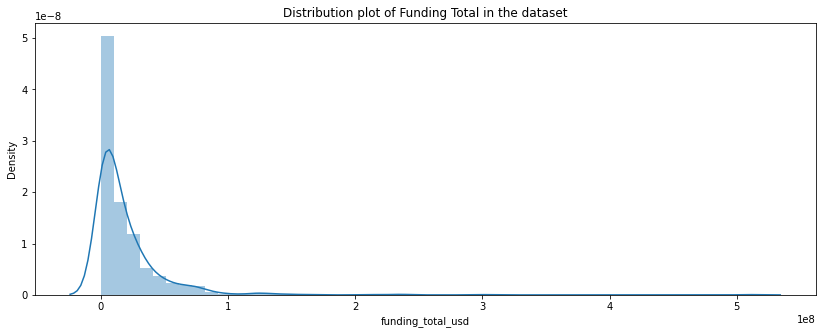

In [28]:
#Distribution plot of the funding_total_usd feature 
plt.figure(figsize=(14,5))
sns.distplot(df_outl_corr['funding_total_usd']).set(title = 'Distribution plot of Funding Total in the dataset')
plt.show()

Although the dataset remains very skewed, it is normal in the startup world to see a wide range of funding. Successful companies are able to scale to hundred of millions of capital. As we can see, only a select few achieve such goal

In [29]:
#Let's see we are left with how many rows
df_outl_corr.shape

(922, 31)

Hence we lost one observation with our outlier correction.

### 1.5 Feature Engineering & Cleaning the Dataset Summary
#### 1.5.1 Replacing NaN & Feature Engineering
We observed that the NaN in the two columns 'age_first_milestone_year' & 'age_last_milestone_year' were cause by the number input in milestones. Hence, by taking the difference of both columns to transform the feature into 'time_to_achieve_milestones' we were able to replace NaN by 0 and the other observation validity would remain. Therefore, we dropped the two original columns and are left with the 'time_to_achieve_milestones'. Losing no observations.  

#### 1.5.2 Feature Engineering
As we saw in the correlation matrix 'age_first_funding_year' & 'age_last_funding_year' have a correlation of 0.76. These features are but a snapshot in time and do not carry any meaning for the time between both. Furthermore, considering we have the number of fundings rounds and amount of funding, I would expect that the 'time_to_full_funding' would be a better predictor of success. For instance, good startups should be able to raise capital more quickly. Also, good companies should become profitable quickly and may require no further funding rounds.  

#### 1.5.3 Outlier
Investigating the outliers, we noticed that the distribution for funding_total_usd was into the billions of dollars which is unlikely. Hence, we wanted to limit our distribution to data within 3x the std. dev. As mentioned above, the dataset remains very skewed, but such distribution is normal in practice since very few startups are capable of raising hundreds of millions of dollars. Doing so we lost 1 observation.


# 1.6 Creating an Alternative Dataset for Modeling

As we mentioned above, although we engineered certain features, there is still the presence of high correlation. Above we identified two possible ways to transform these variables and potentially eliminate the correlation. In this section, we will create the alternative dataset with the new variables to test later.

In [30]:
#Creat a new dataset after correcting for outliers
df2 = df_outl_corr.copy()

In [31]:
#Feature engineer the 'time_to_accomplish_milestones' & 'milestones' into 'avg_time_per_milestones'
df2['avg_time_per_milestones'] = df2['milestones']/df2['time_to_accomplish_milestones']

#Feature engineer the 'time_to_full_funding' & 'funding_rounds' into 'avg_time_per_funding'
df2['avg_time_per_funding'] = df2['funding_rounds']/df2['time_to_full_funding']

In [32]:
#Now drop the 4 columns 'time_to_accomplish_milestones' & 'milestones' & 'time_to_full_funding' & 'funding_rounds'
df2_feat_eng = df2.drop(['milestones', 'time_to_accomplish_milestones', 'funding_rounds', 'time_to_full_funding'], axis = 1)
df2_feat_eng.head()

,Unnamed: 0,labels,relationships,funding_total_usd,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,avg_time_per_milestones,avg_time_per_funding
0,1005,1,3,375000,1,0,0,0,0,0,...,0,1,0,0,0,0,1.0000,0,1.473767,3.981949
1,204,1,9,40100000,1,0,0,0,0,0,...,1,0,0,1,1,1,4.7500,1,inf,0.821136
2,1001,1,5,2600000,1,0,0,0,0,0,...,0,0,1,0,0,0,4.0000,1,2.673797,inf
3,738,1,5,40000000,1,0,0,0,0,1,...,0,0,0,1,1,1,3.3333,1,inf,1.373878
4,1002,0,2,1300000,1,0,0,0,0,0,...,1,1,0,0,0,0,1.0000,1,inf,1.198681


In [33]:
#Explore the distribution
df2_feat_eng['avg_time_per_funding'].describe()

count    922.000000
mean            inf
std             NaN
min        0.277285
25%        1.085713
50%        2.116925
75%             NaN
max             inf
Name: avg_time_per_funding, dtype: float64

In [34]:
number_inf = df2_feat_eng[df2_feat_eng == np.inf].count()
number_inf

Unnamed: 0                   0
labels                       0
relationships                0
funding_total_usd            0
is_CA                        0
is_NY                        0
is_MA                        0
is_TX                        0
is_otherstate                0
is_software                  0
is_web                       0
is_mobile                    0
is_enterprise                0
is_advertising               0
is_gamesvideo                0
is_ecommerce                 0
is_biotech                   0
is_consulting                0
is_othercategory             0
has_VC                       0
has_angel                    0
has_roundA                   0
has_roundB                   0
has_roundC                   0
has_roundD                   0
avg_participants             0
is_top500                    0
avg_time_per_milestones    251
avg_time_per_funding       323
dtype: int64

**A new problem arises with the presence of 'inf' & NaN due to a devision with '0'. This means that the 'milestone' or 'funding_rounds' happened at time '0'. Instead of removing each row, we will replace with 0.**

In [35]:
#Replace the inf and NaN with 0
df2_feat_eng.replace(np.inf, 0, inplace=True)
df2_feat_eng.replace(np.nan, 0, inplace=True)

In [36]:
#Let's see we are left with how many rows
df2_feat_eng.shape

(922, 29)

In this alternative dataset, we are left with 29 features and 922 observations

# 2. Models - Dataset 1 

## 2.1 Train/Test Split

In [37]:
#Rename the final dataset
DF = df_outl_corr.copy()

In [38]:
# Create X & y by splitting the data into a 70/30 split
X = DF.drop(columns = 'labels')
y = DF['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

## 2.2 Scoring the model 

To evaluate the validity of each model we will use the True Positive Rate, False Positive Rate and the Area under the ROC Curve (AUC_ROC). True Positive rate and False Positive rates will derived from the confusion matrix of our classifiers. Since we expect the dataset to be imbalanced such metric wil be much more useful than accuracy. We expect the number of companies that are acquired will be much smaller than those in operation or closed. If we were to use accuracy, our models would probably have a high score even though their will be performing poorly of retrieving the few companies that are more likely to be acquired.  

The ROC curve combines TPR(y-axis) and FPR (x-axis). In general, the AUC is a good metric for binary classification problems.

## 2.3 Models

To begin our approach, we will run a series of models to observe the best performing models.

This list of models are:
    - 'LogisticRegression'
    - 'SVC'
    - 'DecisionTreeClassifier'
    - 'RandomForestClassifier'
    - 'KNeighborsClassifier'
    - 'AdaBoostClassifier'
    - 'MLPClassifier'

From these models, we will seek to accumulate and graph all scoring metrics. These metrics will help up observe the behavior of each model and further discuss our results.  

After compiling our preliminary results, we will select 4 models to perform GridSearch to fine tune the predictive models. Once optimized, we will compare the best parameters/features of each model and will be able to determine the most important/repetitive factors to predict the success of a startup.

### 2.3.1 Cross-Validation of our List of Models

In [39]:
#Create the list of models I want to Run
"""Set Random State to have consistent results"""
random_state = 42
classifiers = []


classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(AdaBoostClassifier(random_state=random_state))
#classifiers.append(XGBoostClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))


In [40]:
#Create a list of scores we would like to monitor
scores = ['roc_auc','f1', 'accuracy', 'precision', 'recall']

In [41]:
# We will create a column transformer to deal with the scaling of the numerical data (only non binary features)

column_transformer = make_column_transformer(
    (StandardScaler(), ['Unnamed: 0', 'relationships', 'funding_rounds', 
                        'funding_total_usd', 'avg_participants']),
    
    remainder='passthrough')

In [42]:
#Creat a loop to run the list of classifiers through the pipeline and through cross_validation

cv_results = []

for model in classifiers:
    model_pipeline = Pipeline([('columns', column_transformer), ('model', model)])
    cv_results.append(cross_validate(model_pipeline, X, y = y, scoring = scores, cv = StratifiedKFold(n_splits = 10)))

In [43]:
#Transform the results into a Table
result_column_name = ['test_roc_auc','test_f1', 'test_accuracy', 'test_precision', 'test_recall', 'fit_time', 'score_time']


cv_table = []

for results in cv_results:
    model_results = {}
    for columns in result_column_name:
        mean = results[columns].mean()
        std = results[columns].std()
        model_results[columns+'_mean'] = mean
        model_results[columns+'_std'] = std
    
    cv_table.append(model_results)
    

    

In [226]:
#Assign the name of the models as the index of the table
models_result_table = pd.DataFrame(cv_table, index = ['LogisticRegression', 'SVC', 'DecisionTreeClassifier', 
                                                      'RandomForestClassifier', 'KNeighborsClassifier',
                                                     'AdaBoostClassifier', 'MLPClassifier'])
models_result_table['models'] = ['LogisticRegression', 'SVC', 'DecisionTreeClassifier', 
                                                      'RandomForestClassifier', 'KNeighborsClassifier',
                                                     'AdaBoostClassifier', 'MLPClassifier']
models_result_table.head()

,test_roc_auc_mean,test_roc_auc_std,test_f1_mean,test_f1_std,test_accuracy_mean,test_accuracy_std,test_precision_mean,test_precision_std,test_recall_mean,test_recall_std,fit_time_mean,fit_time_std,score_time_mean,score_time_std,models
LogisticRegression,0.790603,0.053972,0.813988,0.035256,0.749416,0.042089,0.780666,0.029667,0.854124,0.070476,0.012387,0.001293,0.004905,0.000300,LogisticRegression
SVC,0.771244,0.046133,0.831075,0.014979,0.760297,0.020360,0.763404,0.018087,0.912740,0.027797,0.017575,0.000813,0.010610,0.000490,SVC
DecisionTreeClassifier,0.659096,0.035037,0.759236,0.025054,0.688698,0.030952,0.759162,0.027918,0.759859,0.029830,0.005605,0.000490,0.004805,0.000400,DecisionTreeClassifier
RandomForestClassifier,0.797454,0.049766,0.838833,0.021785,0.776613,0.028006,0.785446,0.020146,0.901045,0.038344,0.104795,0.000459,0.016415,0.000491,RandomForestClassifier
KNeighborsClassifier,0.714146,0.040561,0.796645,0.026968,0.725596,0.031453,0.763688,0.019323,0.834068,0.048647,0.003203,0.000601,0.010094,0.003995,KNeighborsClassifier


### 2.3.2 Graph the Result for Each Score with its Confidence Interval

Text(0.5, 1.0, 'fit_time_mean')

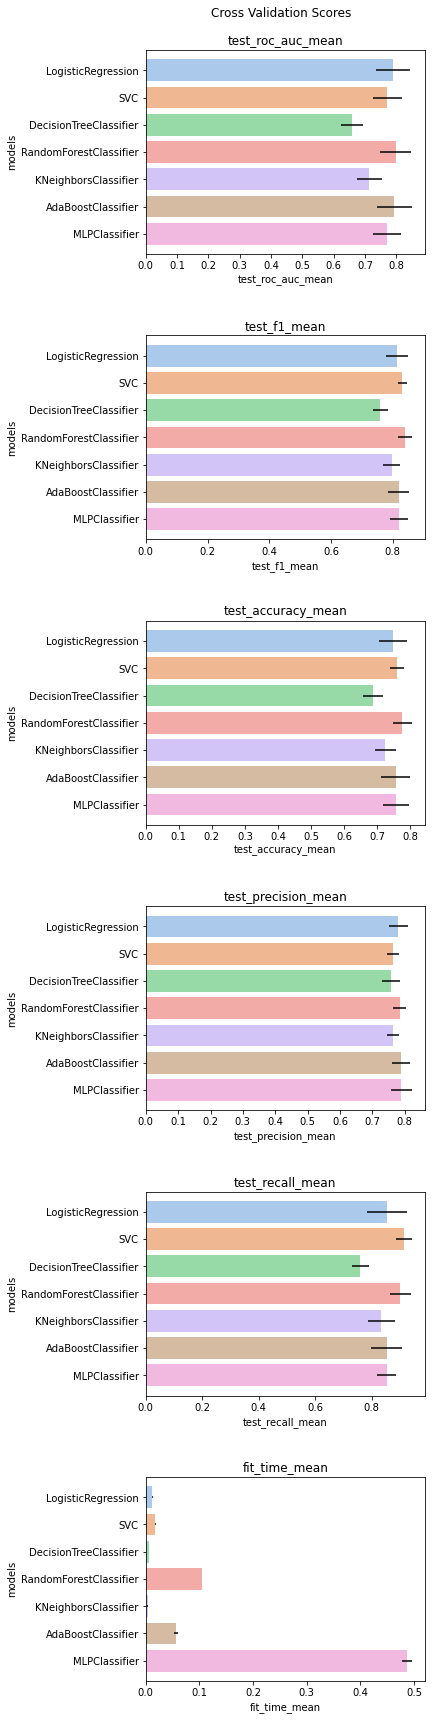

In [45]:
#Now we will plot our results to observe the table and scores of each model

fig, axes = plt.subplots(6, figsize =(5,30))
fig.suptitle('Cross Validation Scores', y=0.9)
fig.subplots_adjust(hspace = 0.4)

#test_roc_auc_mean
sns.barplot(ax = axes[0], x = 'test_roc_auc_mean', y = 'models', palette = 'pastel', data = models_result_table, 
            orient = "h")
axes[0].errorbar(data = models_result_table, x = 'test_roc_auc_mean', y = 'models', 
                                 xerr = 'test_roc_auc_std', ls = '', color = 'black')
axes[0].set_title("test_roc_auc_mean")

#test_f1_mean
sns.barplot(ax = axes[ 1], x = 'test_f1_mean', y = 'models', palette = 'pastel', data = models_result_table, 
            orient = "h")
axes[1].errorbar(data = models_result_table, x = 'test_f1_mean', y = 'models', 
                                 xerr = 'test_f1_std', ls = '', color = 'black')
axes[1].set_title("test_f1_mean")

#test_accuracy_mean
sns.barplot(ax = axes[2], x = 'test_accuracy_mean', y = 'models', palette = 'pastel', data = models_result_table, 
            orient = "h")
axes[2].errorbar(data = models_result_table, x = 'test_accuracy_mean', y = 'models', 
                                 xerr = 'test_accuracy_std', ls = '', color = 'black')
axes[2].set_title("test_accuracy_mean")

#test_precision_mean
sns.barplot(ax = axes[3], x = 'test_precision_mean', y = 'models', palette = 'pastel', data = models_result_table, 
            orient = "h")
axes[3].errorbar(data = models_result_table, x = 'test_precision_mean', y = 'models', 
                                 xerr = 'test_precision_std', ls = '', color = 'black')
axes[3].set_title("test_precision_mean")

#test_recall_mean
sns.barplot(ax = axes[4], x = 'test_recall_mean', y = 'models', palette = 'pastel', data = models_result_table, 
            orient = "h")
axes[4].errorbar(data = models_result_table, x = 'test_recall_mean', y = 'models', 
                                 xerr = 'test_recall_std', ls = '', color = 'black')
axes[4].set_title("test_recall_mean")

#fit_time_mean
sns.barplot(ax = axes[5], x = 'fit_time_mean', y = 'models', palette = 'pastel', data = models_result_table, 
            orient = "h")
axes[5].errorbar(data = models_result_table, x = 'fit_time_mean', y = 'models', 
                                 xerr = 'fit_time_std', ls = '', color = 'black')
axes[5].set_title("fit_time_mean")

    
    

### 2.3 Preliminary Models Summary
We can observe each models performance regarding each scoring metric and its mean fit time to run cross validation.  
In this step, we are looking to reduce the number of models to proceed with our analysis and pick 4 models from the 6 which perform best when fitted to the data.  

As mentioned previously, we will use roc_auc as our main metric to evaluate the performance of each model.  

**roc_auc**
As we can see on the roc_auc graph the top performing models are logistic regression, support vector machines, Random Forest Classifier and AdaBoost.

**F1 & Accuracy**
Similarly, the F1 mean score corroborates the previous conclusion for the exception of logistic regression which has received a lower score. Instead, the MLPClassifier has performed on par as the AdaBoost Classifier. A similar comparison can be made from the accuracy graph. This pushes us to reflect on the model to include although when observing the fit time, I believe we are best to remain with logistic regression since the gain in accuracy would not warrant the additional time to optimize the model using GridSearchCV.
 

### We decide to perform further analysis on 4 of the best models

- LogisticRegression
- SVC
- RandomForestClassifier
- AdaBoostClassifier

Let's remember that our goal is to determine the most important factors in predicting a startups success. Hence, although it is important to select the best model. It is more important to have a selection of models to compare and contrast the most important features in the prediction of the success of a startup.


## 2.4 GridSearch Optimization on the Selected Models

In [230]:
#We will instantiate two objects to save the results of our models

#The first list will store all the best_params_ or best_estimator
best_predictors = []

#The second object will be a dataframe to store the results of each model to be able to compare our results
results_df = pd.DataFrame({'logistic_regression': [], 
                           'svm': [], 
                           'random_forest': [],
                         'AdaBoost': []}, 
                          columns=['ROC_AUC','Accuracy', 'F1', 'Precision', 'Recall', 'Fit Time'])

### 2.4.1 GridSearchCV Optimization - Logistic Regression 

In [233]:
# Parameters we will adjust during the GridSearch

lgr_params = {'lgr__penalty': ['l1', 'l2', 'elasticnet'],
             'lgr__class_weight': ['None', 'balanced']}


# pipeline which includes the column_transformer and the model

lgr_pipe = Pipeline([
    ('columns', column_transformer),
    ('lgr', LogisticRegression())
])

# Create the Grid Search and Train the model
lgr_grid = GridSearchCV(lgr_pipe, param_grid=lgr_params, scoring='roc_auc')
lgr_grid.fit(X_train, y_train)


GridSearchCV(estimator=Pipeline(steps=[('columns',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['Unnamed: '
                                                                          '0',
                                                                          'relationships',
                                                                          'funding_rounds',
                                                                          'funding_total_usd',
                                                                          'avg_participants'])])),
                                       ('lgr', LogisticRegression())]),
             param_grid={'lgr__class_weight': ['None', 'balanced'],
                         'lgr__penalty': ['l1', 'l2', 'elasticnet']},
             scoring='roc_auc')

Best parameters for Logistic Regression found during grid search={'lgr__class_weight': 'balanced', 'lgr__penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.55      0.74      0.63        73
           1       0.86      0.72      0.78       158

    accuracy                           0.72       231
   macro avg       0.70      0.73      0.70       231
weighted avg       0.76      0.72      0.73       231

ROC_AUC Score for best Logistic Regressor = 0.7958210508063118
False Positive Rates:  [0.         0.         0.         0.01369863 0.01369863]
True Positive Rates:  [0.         0.00632911 0.06329114 0.06329114 0.24050633]


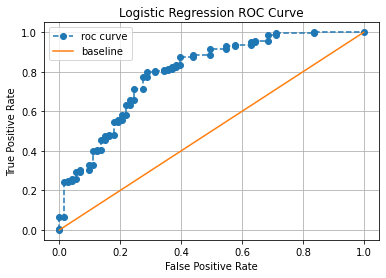

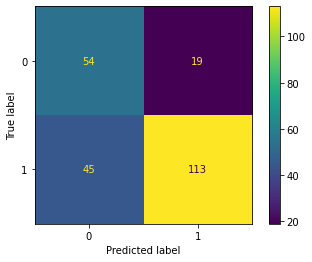

In [234]:
# print out all relevant scores and performance metrics
lgr_best = lgr_grid.best_estimator_
best_predictors.append(lgr_best)
print(f'Best parameters for Logistic Regression found during grid search={lgr_grid.best_params_}')

y_hat = lgr_grid.predict(X_test)
y_hat_probs = lgr_grid.predict_proba(X_test)

lgr_scores = classification_report(y_test, y_hat)
print(lgr_scores)

lgr_roc_score = roc_auc_score(y_test, y_hat_probs[:, 1])
print(f'ROC_AUC Score for best Logistic Regressor = {lgr_roc_score}')


# display roc graph and confusion matrix
fpr, tpr, thresh_rocs = roc_curve(y_test, y_hat_probs[:, 1])
print('False Positive Rates: ', fpr[:5])
print('True Positive Rates: ', tpr[:5])
plt.plot(fpr, tpr, '--o', label = 'roc curve')
plt.plot(tpr, tpr, label = 'baseline')
plt.legend()
plt.title('Logistic Regression ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()

ConfusionMatrixDisplay.from_predictions(y_test, y_hat)

# add key results to results_df
results_df.loc['logistic_regression', 'Accuracy'] = accuracy_score(y_test, y_hat)
results_df.loc['logistic_regression', 'ROC_AUC'] = lgr_roc_score
results_df.loc['logistic_regression', 'F1'] = f1_score(y_test, y_hat)
results_df.loc['logistic_regression', 'Precision'] = precision_score(y_test, y_hat)
results_df.loc['logistic_regression', 'Recall'] = recall_score(y_test, y_hat)

### 2.4.2 GridSearchCV Optimization - Support Vector Machines (SVM)

An important limitation in the parameters list is the kernel. To be able to extract the coefficients of the model, we need the kernel to be linear. Otherwise, we will optimize the parameters below

In [254]:
# params we will do a grid search over
svc_params = {'svc__kernel': ['linear'],
              'svc__C': [0.01, 0.03,0.05,0.07,0.09,0.1,1,10],
             'svc__class_weight': [None, 'balanced']}

# pipeline which includes column transfomer, followed by model
svc_pipe = Pipeline([
    ('columns', column_transformer),
    ('svc', SVC(probability=True))
])


# Create the grid search, train it and time it
svc_grid = GridSearchCV(svc_pipe, param_grid=svc_params, scoring='roc_auc')


#Time the fitting of the model
svc_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columns',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['Unnamed: '
                                                                          '0',
                                                                          'relationships',
                                                                          'funding_rounds',
                                                                          'funding_total_usd',
                                                                          'avg_participants'])])),
                                       ('svc', SVC(probability=True))]),
             param_grid={'svc__C': [0.01, 0.03, 0.05, 0.07, 0.09, 0.1, 0.15,
                                    0.2, 0.4, 0.6, 0.8, 1],
                         'svc__class_weight': [None, 'balanced'],
                         'svc__kernel': ['linear']},
             scoring='roc_auc')

Best parameters for SVM found during grid search={'svc__C': 0.09, 'svc__class_weight': 'balanced', 'svc__kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.52      0.73      0.61        73
           1       0.84      0.69      0.76       158

    accuracy                           0.70       231
   macro avg       0.68      0.71      0.68       231
weighted avg       0.74      0.70      0.71       231

ROC_AUC Score for best svm = 0.7995491590081498
False Positive Rates:  [0.         0.         0.         0.01369863 0.01369863]
True Positive Rates:  [0.         0.00632911 0.05063291 0.05063291 0.25949367]


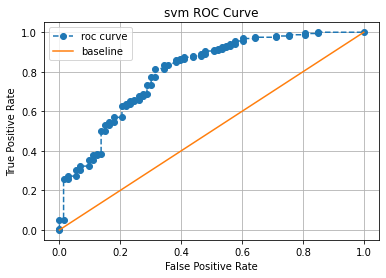

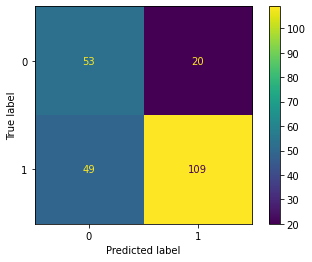

In [255]:
# print out all relevant scores and performance metrics
svc_best = svc_grid.best_estimator_
best_predictors.append(svc_best)


print(f'Best parameters for SVM found during grid search={svc_grid.best_params_}')

y_hat = svc_grid.predict(X_test)
y_hat_probs = svc_grid.predict_proba(X_test)

svc_scores = classification_report(y_test, y_hat)
print(svc_scores)

svc_roc_score = roc_auc_score(y_test, y_hat_probs[:, 1])
print(f'ROC_AUC Score for best svm = {svc_roc_score}')

# display roc graph and confusion matrix

fpr, tpr, thresh_rocs = roc_curve(y_test, y_hat_probs[:, 1])
print('False Positive Rates: ', fpr[:5])
print('True Positive Rates: ', tpr[:5])
plt.plot(fpr, tpr, '--o', label = 'roc curve')
plt.plot(tpr, tpr, label = 'baseline')
plt.legend()
plt.title('svm ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()

ConfusionMatrixDisplay.from_predictions(y_test, y_hat)

# add key results to results_df
results_df.loc['svm', 'Accuracy'] = accuracy_score(y_test, y_hat)
results_df.loc['svm', 'ROC_AUC'] = svc_roc_score
results_df.loc['svm', 'F1'] = f1_score(y_test, y_hat)
results_df.loc['svm', 'Precision'] = precision_score(y_test, y_hat)
results_df.loc['svm', 'Recall'] = recall_score(y_test, y_hat)

### 2.4.3 GridSearchCV Optimization - Random Forest Classifier

In [265]:
# params we will do a grid search over
rf_param = {"rf__max_depth": [10,20,30],
              "rf__max_features": [8,12,16],
              "rf__min_samples_split": [4,6,8],
              "rf__min_samples_leaf": [1,2,5],
              "rf__n_estimators" :[125, 150, 175,200],
              "rf__criterion": ["gini"],
              'rf__class_weight': ['None', 'balanced']}



# pipeline which includes column transfomer, followed by model
rf_pipe = Pipeline([
    ('columns', column_transformer),
    ('rf', RandomForestClassifier())
])


# Create the grid search, train it and time it
rf_grid = GridSearchCV(rf_pipe, param_grid=rf_param, scoring='roc_auc')


#Time the fitting of the model
rf_grid.fit(X_train, y_train)


GridSearchCV(estimator=Pipeline(steps=[('columns',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['Unnamed: '
                                                                          '0',
                                                                          'relationships',
                                                                          'funding_rounds',
                                                                          'funding_total_usd',
                                                                          'avg_participants'])])),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__class_weight': ['None', 'balanced'],
                         'rf__criterion': ['gini'],
                         'rf__max_depth': [10, 20, 30],
                         'rf__max_features': [8, 12, 16],
                         'rf__min_samples_leaf': [1, 2, 5],
                         'rf__min_samples_split': [4, 6, 8],
                         'rf__n_estimators': [125, 150, 175, 200]},
             scoring='roc_auc')

Best parameters for rf found during grid search={'rf__class_weight': 'balanced', 'rf__criterion': 'gini', 'rf__max_depth': 20, 'rf__max_features': 8, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 6, 'rf__n_estimators': 125}
              precision    recall  f1-score   support

           0       0.70      0.62      0.66        73
           1       0.83      0.88      0.86       158

    accuracy                           0.80       231
   macro avg       0.77      0.75      0.76       231
weighted avg       0.79      0.80      0.79       231

ROC_AUC Score for best rf = 0.8096063811340385
False Positive Rates:  [0.         0.         0.         0.01369863 0.01369863]
True Positive Rates:  [0.         0.00632911 0.06962025 0.06962025 0.14556962]


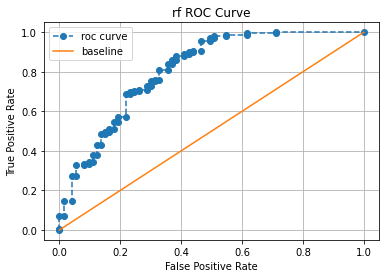

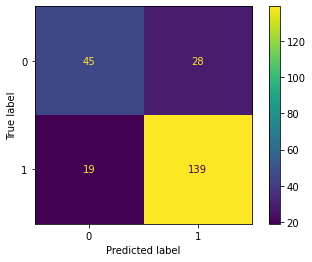

In [266]:
# print out all relevant scores and performance metrics
rf_best = rf_grid.best_estimator_
best_predictors.append(rf_best)


print(f'Best parameters for rf found during grid search={rf_grid.best_params_}')

y_hat = rf_grid.predict(X_test)
y_hat_probs = rf_grid.predict_proba(X_test)

rf_scores = classification_report(y_test, y_hat)
print(rf_scores)

rf_roc_score = roc_auc_score(y_test, y_hat_probs[:, 1])
print(f'ROC_AUC Score for best rf = {rf_roc_score}')

# display roc graph and confusion matrix

fpr, tpr, thresh_rocs = roc_curve(y_test, y_hat_probs[:, 1])
print('False Positive Rates: ', fpr[:5])
print('True Positive Rates: ', tpr[:5])
plt.plot(fpr, tpr, '--o', label = 'roc curve')
plt.plot(tpr, tpr, label = 'baseline')
plt.legend()
plt.title('rf ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()

ConfusionMatrixDisplay.from_predictions(y_test, y_hat)

# add key results to results_df
results_df.loc['random_forest', 'Accuracy'] = accuracy_score(y_test, y_hat)
results_df.loc['random_forest', 'ROC_AUC'] = rf_roc_score
results_df.loc['random_forest', 'F1'] = f1_score(y_test, y_hat)
results_df.loc['random_forest', 'Precision'] = precision_score(y_test, y_hat)
results_df.loc['random_forest', 'Recall'] = recall_score(y_test, y_hat)

### 2.4.4 Adaboost

In [275]:
# params we will do a grid search over
ada_param = {"ada__n_estimators" : [10,15,18,20,25],
              "ada__learning_rate":  [0.1, 0.2, 0.4, 0.6, 0.8, 1],
              'ada__algorithm': ['SAMME', 'SAMME.R']}


# pipeline which includes column transfomer, followed by model
ada_pipe = Pipeline([
    ('columns', column_transformer),
    ('ada', AdaBoostClassifier())
])


# Create the grid search, train it and time it
ada_grid = GridSearchCV(ada_pipe, param_grid=ada_param, scoring='roc_auc')


#Time the fitting of the model
ada_grid.fit(X_train, y_train)


GridSearchCV(estimator=Pipeline(steps=[('columns',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['Unnamed: '
                                                                          '0',
                                                                          'relationships',
                                                                          'funding_rounds',
                                                                          'funding_total_usd',
                                                                          'avg_participants'])])),
                                       ('ada', AdaBoostClassifier())]),
             param_grid={'ada__algorithm': ['SAMME', 'SAMME.R'],
                         'ada__learning_rate': [0.1, 0.2, 0.4, 0.6, 0.8, 1],
                         'ada__n_estimators': [10, 15, 18, 20, 25]},
             scoring='roc_auc')

Best parameters for rf found during grid search={'ada__algorithm': 'SAMME.R', 'ada__learning_rate': 0.6, 'ada__n_estimators': 18}
              precision    recall  f1-score   support

           0       0.70      0.62      0.66        73
           1       0.83      0.88      0.86       158

    accuracy                           0.80       231
   macro avg       0.77      0.75      0.76       231
weighted avg       0.79      0.80      0.79       231

ROC_AUC Score for best ada = 0.8102132824692215
False Positive Rates:  [0.         0.         0.         0.         0.01369863]
True Positive Rates:  [0.         0.00632911 0.0443038  0.05696203 0.05696203]


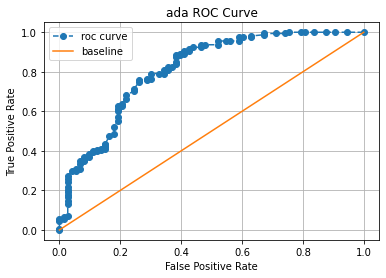

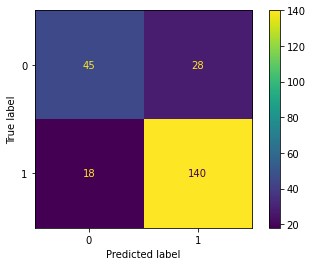

In [276]:
# print out all relevant scores and performance metrics
ada_best = ada_grid.best_estimator_
best_predictors.append(ada_best)


print(f'Best parameters for rf found during grid search={ada_grid.best_params_}')

y_hat = ada_grid.predict(X_test)
y_hat_probs = ada_grid.predict_proba(X_test)

ada_scores = classification_report(y_test, y_hat)
print(rf_scores)

ada_roc_score = roc_auc_score(y_test, y_hat_probs[:, 1])
print(f'ROC_AUC Score for best ada = {ada_roc_score}')

# display roc graph and confusion matrix

fpr, tpr, thresh_rocs = roc_curve(y_test, y_hat_probs[:, 1])
print('False Positive Rates: ', fpr[:5])
print('True Positive Rates: ', tpr[:5])
plt.plot(fpr, tpr, '--o', label = 'roc curve')
plt.plot(tpr, tpr, label = 'baseline')
plt.legend()
plt.title('ada ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()

ConfusionMatrixDisplay.from_predictions(y_test, y_hat)

# add key results to results_df
results_df.loc['AdaBoost', 'Accuracy'] = accuracy_score(y_test, y_hat)
results_df.loc['AdaBoost', 'ROC_AUC'] = ada_roc_score
results_df.loc['AdaBoost', 'F1'] = f1_score(y_test, y_hat)
results_df.loc['AdaBoost', 'Precision'] = precision_score(y_test, y_hat)
results_df.loc['AdaBoost', 'Recall'] = recall_score(y_test, y_hat)

### Print Scores of Each Model

In [277]:
results_df

,ROC_AUC,Accuracy,F1,Precision,Recall,Fit Time
logistic_regression,0.795821,0.722944,0.77931,0.856061,0.71519,NaN
svm,0.799549,0.701299,0.759582,0.844961,0.689873,NaN
random_forest,0.809606,0.796537,0.855385,0.832335,0.879747,NaN
AdaBoost,0.810213,0.800866,0.858896,0.833333,0.886076,NaN


### Summary of the Models  


## 2.5 Results - Graphing the Feature Importance

We will create a function to graph our feature coef and feature importance. This will simplify the later stage when we generate our scatter plots

In [278]:
#This will be a function we will call later for each model
def plotly_scatterplots(model_importances,model_title):
    trace = go.Scatter(
        y = model_importances['coefficient'].values,
        x = model_importances['feature'].values,
        mode='markers',
        marker=dict(
            sizemode = 'diameter',
            sizeref = 1,
            size = 25,
    #       size= feature_dataframe['AdaBoost feature importances'].values,
            #color = np.random.randn(500), #set color equal to a variable
            color = model_importances['coefficient'].values,
            colorscale='Portland',
            showscale=True
        ),
        text = model_importances['feature'].values
    )
    data = [trace]

    layout= go.Layout(
        autosize= True,
        title= model_title,
        hovermode= 'closest',
    #     xaxis= dict(
    #         title= 'Pop',
    #         ticklen= 5,
    #         zeroline= False,
    #         gridwidth= 2,
    #     ),
        yaxis=dict(
            title= 'Feature Importance',
            ticklen= 5,
            gridwidth= 2
        ),
        showlegend= False
    )
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig,filename='capstone 2023')

### 2.5.1 Graph Feature Importance - Logistic Regression

In [279]:
#Fetch the coef from the best estimator and the feature names
lgr_coefs =lgr_grid.best_estimator_.named_steps["lgr"].coef_.flatten()
lgr_cat_cols = lgr_grid.best_estimator_.named_steps["columns"].get_feature_names_out()

#Create the dataframe to store the information
lgr_features = pd.DataFrame(zip(lgr_cat_cols, abs(lgr_coefs)), columns = ['feature', 'coefficient'])

In [280]:
#Clean up the feature names
lgr_features['feature'] = lgr_features['feature'].str.replace('standardscaler__', '')
lgr_features['feature'] = lgr_features['feature'].str.replace('remainder__', '')
lgr_features.head()

,feature,coefficient
0,Unnamed: 0,0.244764
1,relationships,0.870687
2,funding_rounds,0.086731
3,funding_total_usd,0.080750
4,avg_participants,0.262268


In [281]:
#Create Logistic Regression Feature Importance Graph using the instantiated function
plotly_scatterplots(lgr_features, 'Logistic Regression Feature Importances')

### 2.5.2 Graph Feature Importance - Support Vector Machine (SVM)

In [282]:
#Fetch the coef from the best estimator and the feature names
svc_coefs =svc_grid.best_estimator_.named_steps["svc"].coef_.flatten()
svc_cat_cols = svc_grid.best_estimator_.named_steps["columns"].get_feature_names_out()

#Create the dataframe to store the information
svc_features = pd.DataFrame(zip(svc_cat_cols, abs(svc_coefs)), columns = ['feature', 'coefficient'])

In [283]:
#Clean up the feature names
svc_features['feature'] = svc_features['feature'].str.replace('standardscaler__', '')
svc_features['feature'] = svc_features['feature'].str.replace('remainder__', '')

In [284]:
#Create Logistic Regression Feature Importance Graph using the instantiated function
plotly_scatterplots(svc_features, 'Random Forest Feature Importances')

### 2.5.3 Graph Feature Importance - Random Forest

In [285]:
#Fetch the coef from the best estimator and the feature names
rf_coefs =rf_grid.best_estimator_.named_steps["rf"].feature_importances_.flatten()
rf_cat_cols = rf_grid.best_estimator_.named_steps["columns"].get_feature_names_out()

#Create the dataframe to store the information
rf_features = pd.DataFrame(zip(rf_cat_cols, abs(rf_coefs)), columns = ['feature', 'coefficient'])

In [286]:
#Clean up the feature names
rf_features['feature'] = rf_features['feature'].str.replace('standardscaler__', '')
rf_features['feature'] = rf_features['feature'].str.replace('remainder__', '')

In [287]:
#Create Logistic Regression Feature Importance Graph using the instantiated function
plotly_scatterplots(rf_features, 'Random Forest Feature Importances')

### 2.5.4 Graph Feature Importance - AdaBoost Classifier

In [288]:
#Fetch the coef from the best estimator and the feature names
ada_coefs =ada_grid.best_estimator_.named_steps["ada"].feature_importances_.flatten()
ada_cat_cols = ada_grid.best_estimator_.named_steps["columns"].get_feature_names_out()

#Create the dataframe to store the information
ada_features = pd.DataFrame(zip(ada_cat_cols, abs(ada_coefs)), columns = ['feature', 'coefficient'])

In [289]:
#Clean up the feature names
ada_features['feature'] = ada_features['feature'].str.replace('standardscaler__', '')
ada_features['feature'] = ada_features['feature'].str.replace('remainder__', '')

In [290]:
#Create Logistic Regression Feature Importance Graph using the instantiated function
plotly_scatterplots(ada_features, 'AdaBoost Feature Importances')

### 2.5.5 Summary of the Results

Although all models have a similar roc_auc score, the highest score was from the AdaBoost Model with 0.810. Logistic Regression has the lowest score with 0.796. 

Preliminary results show the following:
**Decision Tree Based Classifiers**
- Classifier "AdaBoost" and "Random Forest" are models using regression trees. Using such models, it is normal to see the importance of One Hot Encoded variables to be lower since the decision tree decision takes weights each variable for the decision to the rest of the dataset hence a lower strength since it mostly applies to a small subset of the data. Furthermore, it is very interesting to see that in the One Hot Encoded Variables in these models the feature has_VC is the most important feature of this class.
- Relationships is the most consistent feature with a high prediction importance.
- The interestingly the total funding in USD does not have a great impact on the success of a company. This challenges the optic that companies capable to raise a lot of money or are seen as industry challengers by investors carries almost no weight to the outcome of success.

**Other Models**
- The logistic Regression and SVM highlight as 2 most important features: "relationships" and "is_top500"
- The 2 highest sectors to be successful is "ecommerce" and "biotech"
- Furthermore, across the funding round it is interesting to note that the presence of a VC_round is very good to success but the importance of the following 2-3 rounds are less important finishing with the presence of round_D as the most important
- interesting to note is the state of california figures to be a less important predictor of success. As an important state for startups this is surprising

# 3. Conclusion - Results

In conclusion, the best predictor of succes for a startups are the relationships, in the one hot encoded variables: has_VC, has_round_D, is_biotech and is_ecommerce.

**Business Interpretation**
The business interpretation of these variables are as follows:
- relationships: as mentioned above the description of this variable is still unclear as the relationship could be toward clients or investors but in a general sense the larger the companies strategic network the more likely it is to succeed.
- has_VC: can be interpreted in practice as the presence of this first investor of institutional investor with a wide network and deep knowledge of the industry is an important step for a startups success.
- has_round_D is another important step showing a continued success from the company and ability to raise many rounds of investments. At this stage the company probably already has strong sales and is profitable or almost. Such stage in practice is usually much less risky to invest and the models seem to capture this concept.
- is_biotech and is_ecommerce are the most promising industries from this dataset. Biotech is a "Boom" or "Bust" industry that attracted a lot of attention in the last 10 years. In fact, these 2 industries have seen a lot of interest and seem to corroborate the excitement of investors by being a factor of importance in the prediction models. 

# 4. Next Steps & Improvements

- I believe the main improvement for this project would be to find a cleaner dataset. Through EDA, it was clear that this dataset was very manipulated and did not provide a lot of description of their variables. Having the raw data with a clear description would greatly help the conclusions of this project.

- Finding more data which better sampled the entire startup market would provide, in my opinion, a very different story although the key findings highlighted remain reasonable for this setting.

- Previous researchers have tried to predict startups success from different types of data. To build their prediction models, some have combined financial data(similar to above) with news outlets about the companies using a natural language processor. This approach seems promising as the study conducted increase the TPR from 60% to 79.8%. This could be an interesting pathway to investigate and find ways to combine news (dynamic) with financial (static) data as a predictor of success.

- Other researcher have started from VC investment questionaires as the main features to investigate or lead to success.

- Furthermore, I believe other path for feature engineering could be possible as highlighted above certain features although not correlated did not provide great insight or were similar to other variables in the dataset.